# Graph Visualization Tool - Testing & Demonstration

Test the graph visualization tool against various lattice structures to verify consistency.

## Purpose

1. **Visualize lattices** - See structure as property graphs
2. **Test consistency** - Verify all lattices follow same patterns
3. **Debug structures** - Identify issues in graph topology
4. **Export graphs** - Save in multiple formats (GraphML, DOT, JSON)

## Structures Tested

- Adjacency Matrix (AM)
- W Lattice (row/column HLLSets)
- Database hierarchy (tables/columns)
- Entanglement networks

In [1]:
# Import required modules
from core.graph_visualizer import (
    LatticeGraphBuilder, 
    LatticeVisualizer,
    test_consistency
)
from core.hllset import HLLSet
from core.hrt import AdjacencyMatrix
from core.manifold_os import ManifoldOS
from pathlib import Path
import matplotlib.pyplot as plt

# Set up matplotlib for better display
%matplotlib inline
plt.rcParams['figure.dpi'] = 100

print("✓ Imports successful")

✓ Imports successful


## Test 1: Visualize Adjacency Matrix

Create a simple adjacency matrix and visualize it as a graph.

In [2]:
# Create a simple adjacency matrix adapter for testing
# (The production AdjacencyMatrix requires HRTConfig)
import numpy as np

class SimpleAdjacencyMatrix:
    """Simple adjacency matrix for demo purposes."""
    def __init__(self, tokens):
        self.tokens = tokens
        self.matrix = np.zeros((len(tokens), len(tokens)), dtype=np.int32)
    
    def add_adjacency(self, i, j, value=1):
        """Add adjacency from token i to token j."""
        self.matrix[i, j] = value
    
    def __repr__(self):
        return f"AdjacencyMatrix({len(self.tokens)} tokens)"

# Use the simple version for demo
AdjacencyMatrix = SimpleAdjacencyMatrix

print("✓ Created SimpleAdjacencyMatrix for demo")

✓ Created SimpleAdjacencyMatrix for demo


In [3]:
# Create simple adjacency matrix
tokens = ["Alice", "Bob", "Carol", "Dave"]
am = AdjacencyMatrix(tokens)

# Add some adjacencies (who knows whom)
am.add_adjacency(0, 1)  # Alice -> Bob
am.add_adjacency(0, 2)  # Alice -> Carol
am.add_adjacency(1, 3)  # Bob -> Dave
am.add_adjacency(2, 3)  # Carol -> Dave
am.add_adjacency(3, 0)  # Dave -> Alice (cycle)

print("Adjacency Matrix:")
print(am.matrix)
print(f"\nTokens: {am.tokens}")

Adjacency Matrix:
[[0 1 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [1 0 0 0]]

Tokens: ['Alice', 'Bob', 'Carol', 'Dave']


In [4]:
# Build graph from adjacency matrix
builder = LatticeGraphBuilder()
builder.from_adjacency_matrix(am, name="Social Network")

# Test consistency
consistency = test_consistency(builder)
print("Consistency Test:")
print(f"  Passed: {consistency['passed']}")
if consistency['errors']:
    print(f"  Errors: {consistency['errors']}")
if consistency['warnings']:
    print(f"  Warnings: {consistency['warnings']}")

# Get statistics
viz = LatticeVisualizer(builder)
viz.print_statistics()

Consistency Test:
  Passed: True
LATTICE GRAPH STATISTICS
Nodes: 4
Edges: 5
Density: 0.4167
Weakly connected: True

Degree statistics:
  Average: 2.50
  Min: 2
  Max: 3

Node types:
  token               :    4

Edge types:
  adjacent            :    5


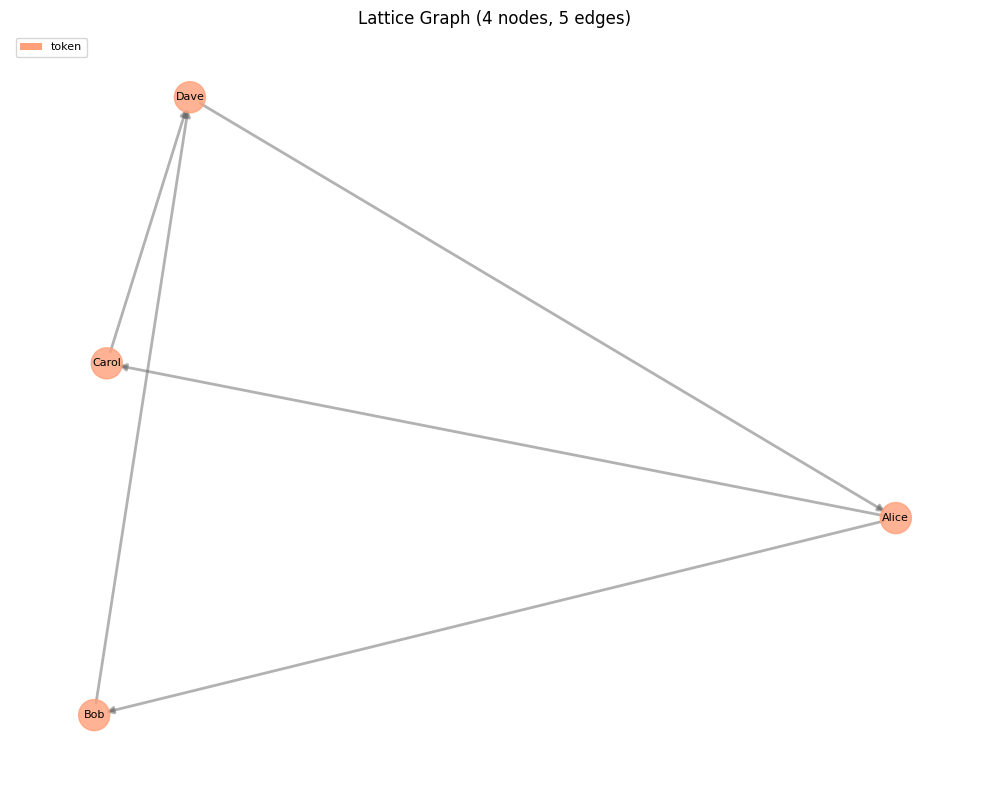

In [5]:
# Visualize
viz.plot(
    figsize=(10, 8),
    layout='spring',
    show_labels=True
)

## Test 2: Visualize W Lattice

Create a W lattice with rows and columns as HLLSets.

In [6]:
# Create sample W lattice structure
# Simulate: 3 rows (documents), 3 columns (topics)

class SimpleWLattice:
    def __init__(self):
        # Row HLLSets (documents)
        self.rows = [
            HLLSet.from_batch(["data", "science", "machine", "learning"]),
            HLLSet.from_batch(["machine", "learning", "neural", "networks"]),
            HLLSet.from_batch(["data", "analytics", "business", "intelligence"])
        ]
        
        # Column HLLSets (topics)
        self.columns = [
            HLLSet.from_batch(["data", "analytics"]),  # Data topic
            HLLSet.from_batch(["machine", "learning", "neural"]),  # ML topic
            HLLSet.from_batch(["business", "intelligence"])  # Business topic
        ]

w_lattice = SimpleWLattice()

print("W Lattice:")
print(f"  Rows: {len(w_lattice.rows)}")
print(f"  Columns: {len(w_lattice.columns)}")
print(f"\nRow cardinalities: {[r.cardinality() for r in w_lattice.rows]}")
print(f"Column cardinalities: {[c.cardinality() for c in w_lattice.columns]}")

W Lattice:
  Rows: 3
  Columns: 3

Row cardinalities: [4.007832904843586, 4.007832904843586, 4.007832904843586]
Column cardinalities: [2.001955671862574, 3.004403133222472, 2.001955671862574]


In [7]:
# Build graph from W lattice
builder = LatticeGraphBuilder()
builder.from_w_lattice(w_lattice, name="Document-Topic Lattice")

# Test consistency
consistency = test_consistency(builder)
print("Consistency Test:")
print(f"  Passed: {consistency['passed']}")

# Statistics
viz = LatticeVisualizer(builder)
viz.print_statistics()

Consistency Test:
  Passed: True
LATTICE GRAPH STATISTICS
Nodes: 6
Edges: 0
Density: 0.0000
Weakly connected: False

Degree statistics:
  Average: 0.00
  Min: 0
  Max: 0

Node types:
  col_hllset          :    3
  row_hllset          :    3

Edge types:


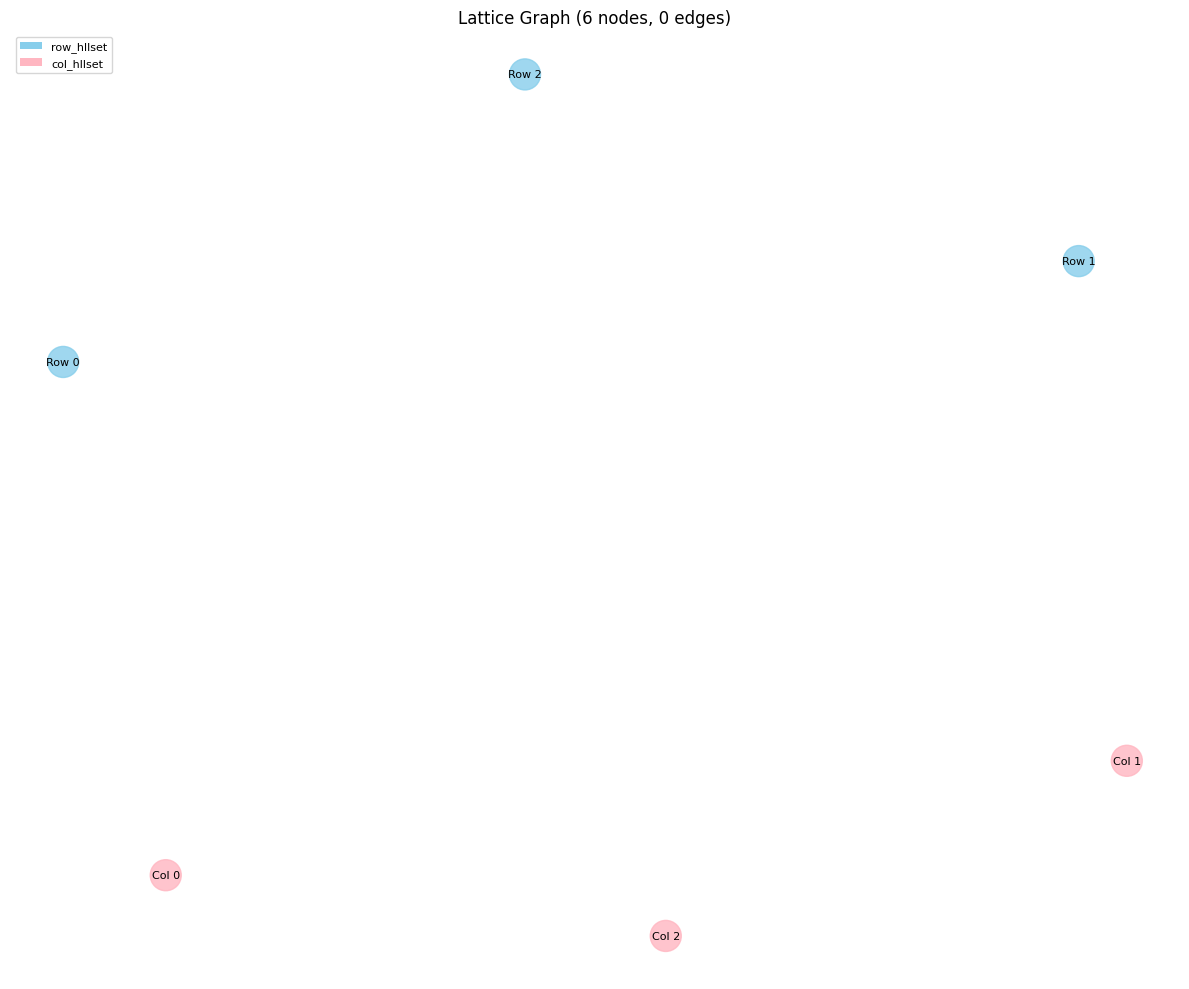

In [8]:
# Visualize W lattice
viz.plot(
    figsize=(12, 10),
    layout='spring',
    show_labels=True
)

## Test 3: Visualize Database Hierarchy

If you have ingested database, visualize its structure.

**Skip this section if you don't have ingestion result yet.**

In [9]:
# Check for ingestion result
import json

result_path = Path('./data/ingestion_result.json')

if result_path.exists():
    with open(result_path, 'r') as f:
        ingestion_result = json.load(f)
    
    print("✓ Ingestion result found")
    print(f"  Database: {ingestion_result['database']['data_id']}")
    print(f"  Tables: {len(ingestion_result['tables'])}")
    has_ingestion = True
else:
    print("✗ No ingestion result found")
    print("  Run workbook_db_ingestion.ipynb first to create real data")
    has_ingestion = False

✗ No ingestion result found
  Run workbook_db_ingestion.ipynb first to create real data


In [10]:
# Visualize database hierarchy
if has_ingestion:
    # Initialize ManifoldOS
    manifold = ManifoldOS()
    
    # Build graph
    builder = LatticeGraphBuilder()
    builder.from_database_hierarchy(ingestion_result, manifold)
    
    # Test consistency
    consistency = test_consistency(builder)
    print("Consistency Test:")
    print(f"  Passed: {consistency['passed']}")
    if consistency['errors']:
        print(f"  Errors:")
        for error in consistency['errors']:
            print(f"    - {error}")
    if consistency['warnings']:
        print(f"  Warnings:")
        for warning in consistency['warnings']:
            print(f"    - {warning}")
    
    # Statistics
    viz = LatticeVisualizer(builder)
    viz.print_statistics()
else:
    print("Skipping - no ingestion data")

Skipping - no ingestion data


In [11]:
# Visualize full database hierarchy
if has_ingestion:
    # Warning: may be very large!
    if builder.graph.number_of_nodes() > 100:
        print(f"Graph has {builder.graph.number_of_nodes()} nodes - this may take a while...")
    
    viz.plot(
        figsize=(16, 12),
        layout='spring',
        show_labels=False  # Too many labels
    )
else:
    print("Skipping - no ingestion data")

Skipping - no ingestion data


### Visualize Subgraph

For large graphs, visualize just a portion around specific nodes.

In [12]:
# Visualize subgraph around first table
if has_ingestion:
    # Get first table node
    table_nodes = [nid for nid, meta in builder.nodes.items() if meta.node_type == 'table']
    
    if table_nodes:
        first_table = table_nodes[0]
        print(f"Visualizing subgraph around: {builder.nodes[first_table].label}")
        
        viz.plot_subgraph(
            node_ids=[first_table],
            depth=2,  # Include table, columns, and database
            figsize=(12, 8),
            show_labels=True
        )
else:
    print("Skipping - no ingestion data")

Skipping - no ingestion data


### Detect Foreign Keys

Analyze column similarity to detect potential foreign keys.

In [13]:
# Detect potential foreign keys
if has_ingestion:
    fk_count = builder.detect_potential_foreign_keys(threshold=0.7)
    
    print(f"Detected {fk_count} potential foreign key relationships")
    
    if fk_count > 0:
        # Show FK edges
        fk_edges = [e for e in builder.edges if e.edge_type == 'potential_fk']
        print("\nPotential Foreign Keys:")
        for edge in fk_edges[:10]:  # Show first 10
            source_label = builder.nodes[edge.source].label
            target_label = builder.nodes[edge.target].label
            confidence = edge.properties.get('confidence', 0)
            print(f"  {source_label:40s} → {target_label:40s} ({confidence:.2f})")
else:
    print("Skipping - no ingestion data")

Skipping - no ingestion data


## Test 4: Export Graphs

Export graphs to various formats for external tools.

In [14]:
# Create export directory
export_dir = Path('./data/graph_exports')
export_dir.mkdir(exist_ok=True, parents=True)

print(f"Export directory: {export_dir}")

Export directory: data/graph_exports


In [15]:
# Export adjacency matrix graph
builder_am = LatticeGraphBuilder()
builder_am.from_adjacency_matrix(am, "Social Network")

# Export to different formats
builder_am.export_graphml(export_dir / 'adjacency_matrix.graphml')
builder_am.export_json(export_dir / 'adjacency_matrix.json')

try:
    builder_am.export_dot(export_dir / 'adjacency_matrix.dot')
    print("✓ Exported to GraphML, JSON, and DOT")
except:
    print("✓ Exported to GraphML and JSON (DOT requires pydot)")

print(f"\nFiles in {export_dir}:")
for f in export_dir.glob('*'):
    print(f"  {f.name}")

✓ Exported to GraphML and JSON (DOT requires pydot)

Files in data/graph_exports:
  adjacency_matrix.graphml
  adjacency_matrix.json
  adjacency_matrix.dot


In [16]:
# Export W lattice graph
builder_w = LatticeGraphBuilder()
builder_w.from_w_lattice(w_lattice, "Document-Topic")

builder_w.export_graphml(export_dir / 'w_lattice.graphml')
builder_w.export_json(export_dir / 'w_lattice.json')

print("✓ Exported W lattice")

✓ Exported W lattice


In [17]:
# Export database hierarchy (if available)
if has_ingestion:
    builder.export_graphml(export_dir / 'database_hierarchy.graphml')
    builder.export_json(export_dir / 'database_hierarchy.json')
    print("✓ Exported database hierarchy")
else:
    print("Skipping database export - no ingestion data")

Skipping database export - no ingestion data


## Test 5: Consistency Check Summary

Run consistency tests on all graph types.

In [18]:
# Test all graph types
test_results = {}

# Adjacency Matrix
builder_am = LatticeGraphBuilder()
builder_am.from_adjacency_matrix(am)
test_results['adjacency_matrix'] = test_consistency(builder_am)

# W Lattice
builder_w = LatticeGraphBuilder()
builder_w.from_w_lattice(w_lattice)
test_results['w_lattice'] = test_consistency(builder_w)

# Database (if available)
if has_ingestion:
    builder_db = LatticeGraphBuilder()
    builder_db.from_database_hierarchy(ingestion_result, manifold)
    test_results['database_hierarchy'] = test_consistency(builder_db)

# Print summary
print("="*60)
print("CONSISTENCY CHECK SUMMARY")
print("="*60)

for graph_type, result in test_results.items():
    status = "✓ PASSED" if result['passed'] else "✗ FAILED"
    print(f"\n{graph_type:25s}: {status}")
    
    if result['errors']:
        print(f"  Errors ({len(result['errors'])}):")
        for error in result['errors'][:5]:  # Show first 5
            print(f"    - {error}")
    
    if result['warnings']:
        print(f"  Warnings ({len(result['warnings'])}):")
        for warning in result['warnings'][:3]:  # Show first 3
            print(f"    - {warning}")

all_passed = all(r['passed'] for r in test_results.values())
print("\n" + "="*60)
if all_passed:
    print("✓ ALL TESTS PASSED - Lattices are consistent!")
else:
    print("✗ SOME TESTS FAILED - Check errors above")
print("="*60)

CONSISTENCY CHECK SUMMARY

adjacency_matrix         : ✓ PASSED

w_lattice                : ✓ PASSED

✓ ALL TESTS PASSED - Lattices are consistent!


## Summary

The graph visualization tool provides:

✅ **Property graphs** - Nodes and edges with full metadata  
✅ **Multiple formats** - GraphML, DOT, JSON export  
✅ **Consistency testing** - Verify lattice structure integrity  
✅ **Visualization** - See structure visually  
✅ **Subgraph extraction** - Focus on specific areas  
✅ **FK detection** - Automatic relationship discovery  

## Next Steps

1. Use with real database ingestion in [workbook_db_ingestion.ipynb](workbook_db_ingestion.ipynb)
2. Export graphs for analysis in Gephi, Neo4j, or other tools
3. Extend with custom node/edge types for your use case
4. Build on this foundation for graph algorithms (centrality, communities, etc.)